In [1]:
from datetime import datetime
from collections import defaultdict
import re
import pickle
import pandas as pd
from netCDF4 import Dataset, num2date #pylint: disable=no-name-in-module
import numpy as np
import numpy.ma as ma
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import scipy.optimize as opt
from scipy.stats import linregress
import seaborn as sn
import cmasher as cmr
import mpl_axes_aligner


from functions_summary import *

In [2]:
path_forcing_era5 = '/home/vpo001/storage/bc/all_years/final_forcing/scaled_era5_all.nc'
path_forcing_jra55 = '/home/vpo001/storage/bc/all_years/final_forcing/scaled_merra2_all.nc'
path_forcing_merra2 = '/home/vpo001/storage/bc/all_years/final_forcing/scaled_jra55_all.nc'
path_ground = '/home/vpo001/storage/bc/all_years/niagara_results/result_soil_temperature.nc'
path_snow = '/home/vpo001/storage/bc/all_years/niagara_results/result_snow_depth.nc'
path_swe = '/home/vpo001/storage/bc/all_years/niagara_results/result_swe.nc'
path_thaw_depth = '/home/vpo001/storage/bc/all_years/niagara_results/result_thaw_depth.nc'
path_repository = '/home/vpo001/storage/bc/all_years/niagara_results/folder_manifest.csv'
site = 'Joffre_new'
year_bkg_end = 2000
year_trans_end = 2020
forcing_list = ['era5', 'jra55', 'merra2']
path_forcing_list = [path_forcing_era5, path_forcing_jra55, path_forcing_merra2]
no_weight = True
consecutive = 7
glacier = False
min_glacier_depth = 100

In [3]:
df, reanalysis_stats, list_valid_sim, dict_melt_out, stats_melt_out_dic, df_stats = get_all_stats(forcing_list, path_forcing_list, path_repository, path_ground, path_snow,
                                                                                                  year_bkg_end, year_trans_end, consecutive, site,
                                                                                                  glacier, min_glacier_depth)

Succesfully opened the pre-existing pickle: df_Joffre_new.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Joffre_new.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Joffre_new.pkl
Succesfully opened the pre-existing pickle: melt_out_Joffre_new.pkl
Succesfully opened the pre-existing pickle: df_stats_Joffre_new.pkl


In [4]:
df, reanalysis_stats, list_valid_sim, dict_melt_out, stats_melt_out_dic, df_stats = load_all_pickles(site)

Succesfully opened the pre-existing pickle: df_Joffre_new.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Joffre_new.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Joffre_new.pkl
Succesfully opened the pre-existing pickle: melt_out_Joffre_new.pkl
Succesfully opened the pre-existing pickle: df_stats_Joffre_new.pkl


Succesfully opened the pre-existing pickle: df_Joffre_new.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Joffre_new.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Joffre_new.pkl
Succesfully opened the pre-existing pickle: melt_out_Joffre_new.pkl
Succesfully opened the pre-existing pickle: df_stats_Joffre_new.pkl


The following plot is a histogram of the distribution of the statistical weights of all simulations:


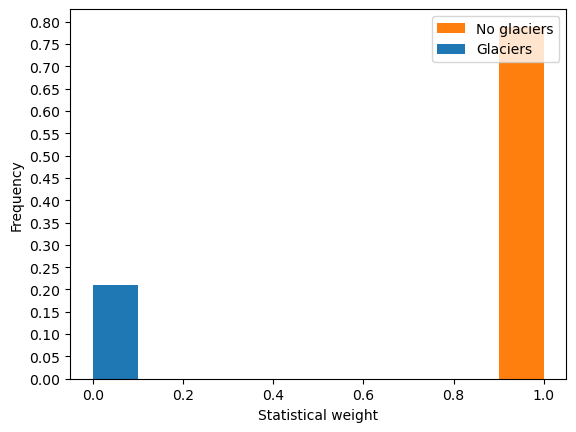

The following plot is a histogram of the distribution of glacier simulations wrt to altitude, aspect, slope, and forcing:
[52 92 72]
[33 31 26 23 22 23 26 32]
[ 8 29 68 52 59]
[76 71 69]


<Figure size 640x480 with 0 Axes>

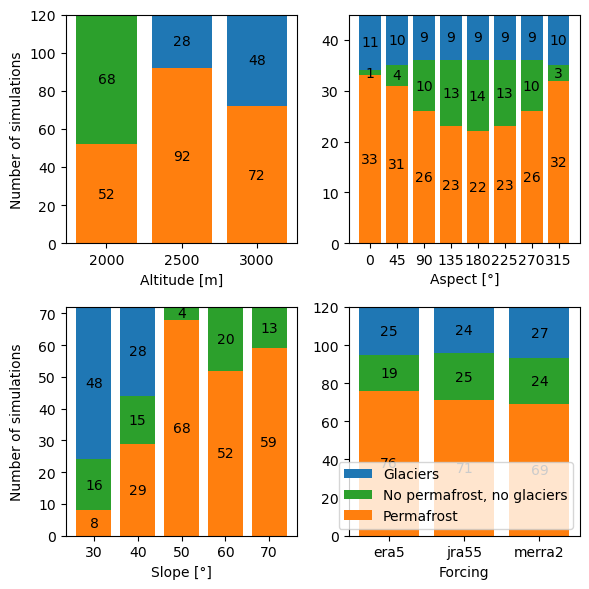

List of altitudes: [2000, 2500, 3000]
Altitude at which we plot the time series: 2500
List of altitudes: [2000, 2500, 3000]
Altitude at which we plot the time series: 2500
Plot of yearly statistics for atmospheric timeseries. Mean and several quantiles for each year:


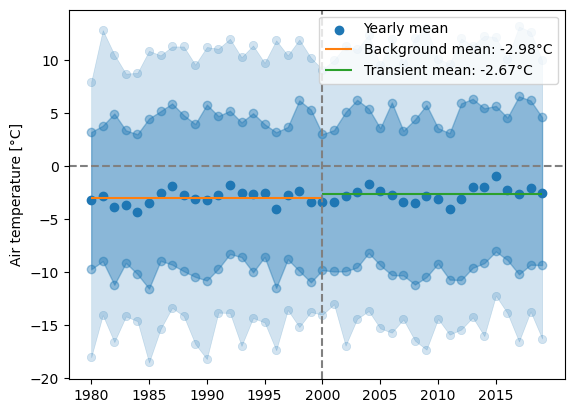

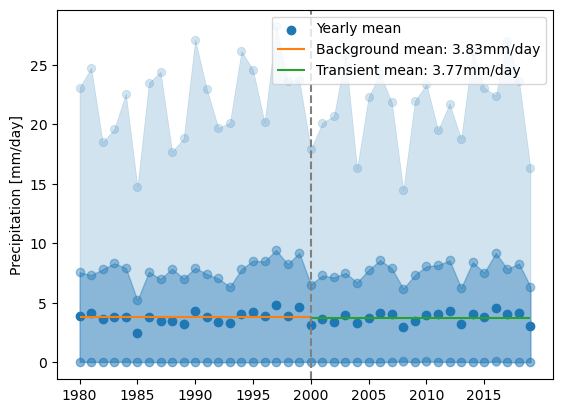

Plot of yearly statistics for simulated timeseries. Mean and several quantiles for each year:


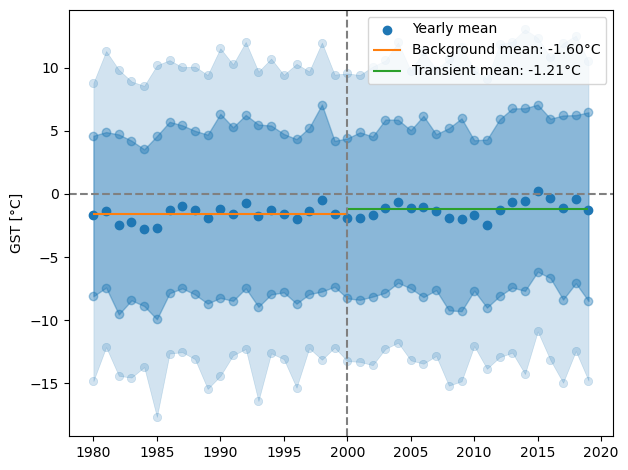

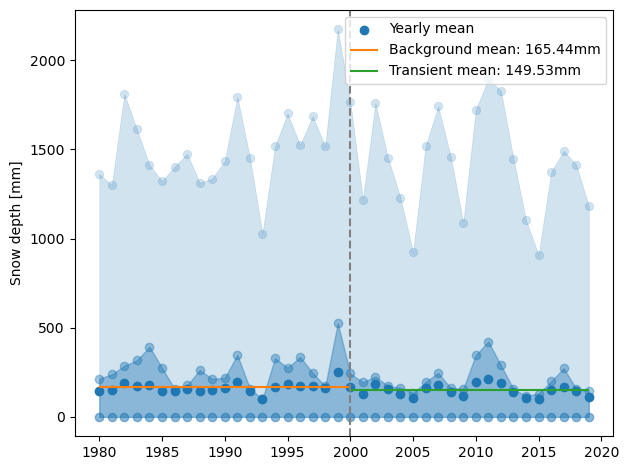

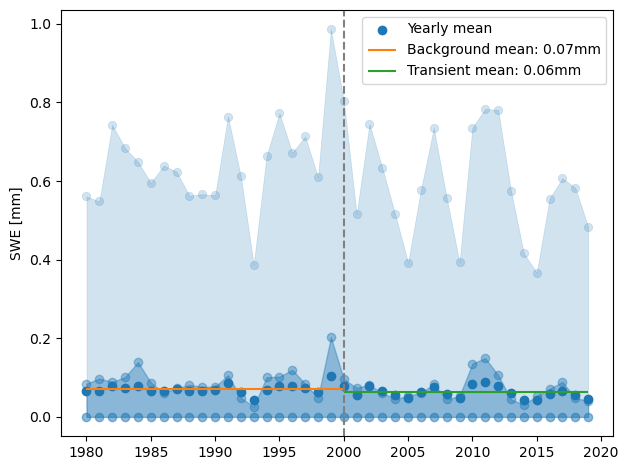

Histogram of the evolution of the snow cover (in days) and melt-out date:
Succesfully opened the pre-existing pickle: df_Joffre_new.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Joffre_new.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Joffre_new.pkl
Succesfully opened the pre-existing pickle: melt_out_Joffre_new.pkl
Succesfully opened the pre-existing pickle: df_stats_Joffre_new.pkl


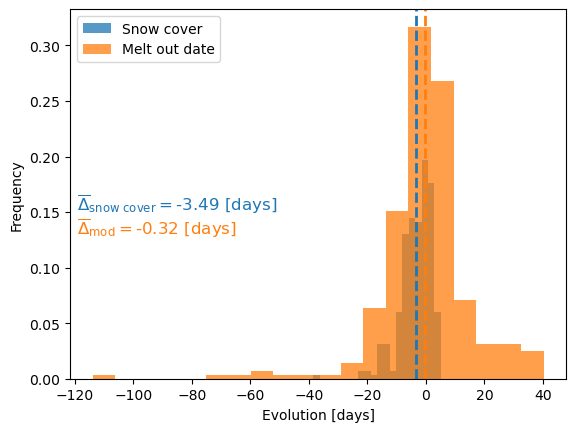

Plot of 2 timeseries reduced to a 1-year window with mean and 1- and 2-sigma spread:


<Figure size 640x480 with 0 Axes>

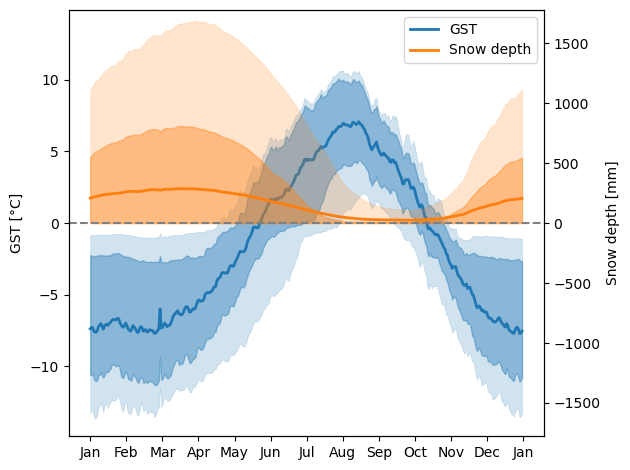

Plot of a single timeseries reduced to a 1-year window with mean and 1 and 2-sigma spread, for background and transient piods:


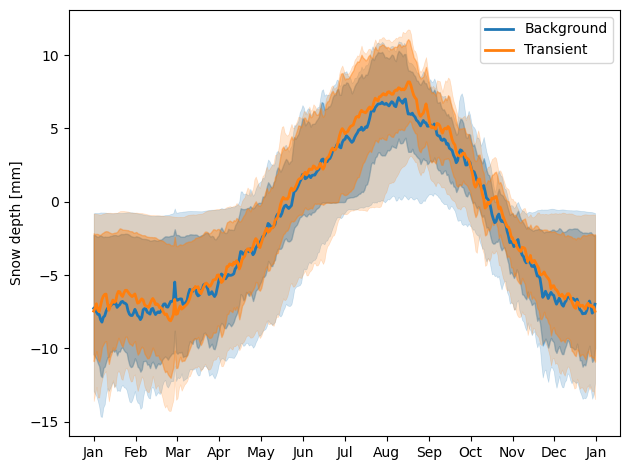

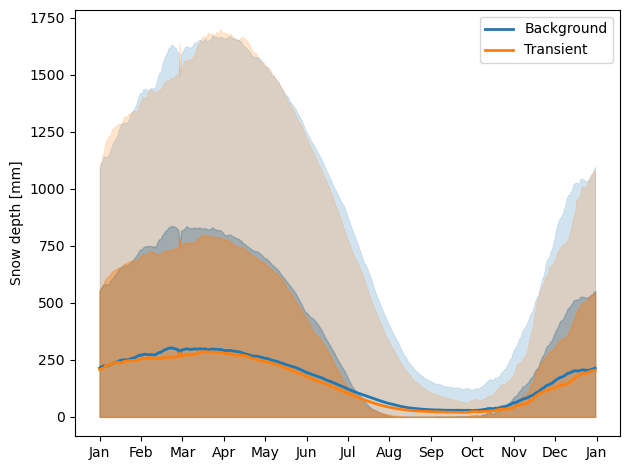

<Figure size 640x480 with 0 Axes>

In [5]:
plot_all(site, forcing_list, path_forcing_list, path_ground, path_snow, path_swe, path_thaw_depth,
         year_bkg_end, year_trans_end, no_weight=True,
         individual_heatmap=False, polar_plots=False, parity_plot=True)